<p>hello Deep world</p>
<code>
a<sub>i</sub> = w<sub>i</sub> &deg; h<sub>i-1</sub> + b<sub>i</sub>
</code>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from keras.datasets import fashion_mnist


## Creating Forward pass

In [49]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
type(x_train)

numpy.ndarray

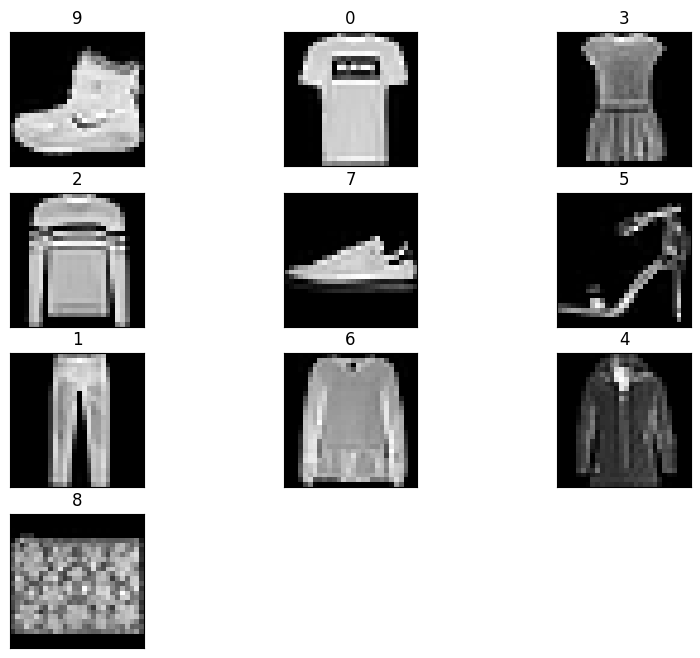

In [50]:
# dispaly the image for each type of dataset
displayed = []

row = 0
col = 0
index = 0
plt.figure(figsize=(10, 8))
while len(displayed) < len(np.unique(y_train)):
  if y_train[index] not in displayed:

    plt.subplot(4,3, len(displayed) + 1 ).imshow(x_train[index,:, :], cmap='gray')
    displayed.append(y_train[index])
    plt.title(y_train[index])
    plt.xticks([])
    plt.yticks([])

  index += 1

## Solving graded assignmet week 3

In [51]:
params = np.load('week3/parameters.npz')
params.values()
W1, W2, W3 = params['W1'], params['W2'], params['W3']
b1, b2, b3 = params['b1'], params['b2'], params['b3']
x= np.array([1, 0, 1]).reshape(3, 1)
y = np.array([0, 0, 1]).reshape(3, 1)

### Important functinos
- this is a classification problem 
- using softmax function
- normal gradient descent function for error solving
- using cross entropy loss for solving this function

In [52]:
def corss_entropy_loss(y, y_hat):
  return -np.sum(y * np.log(y_hat))

# cross entropy loss/ outupt function + a-N(preactivation for output)
def derivative_wrt_output_layer(y, y_hat):
  return -1*(y-y_hat)

def derivative_wrt_hidden_layer(w, der_prev):
  return w.T @ der_prev

def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def derivative_of_sigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

def derivative_wrt_hidden_preactivation(prev_der, g_x, g_func= 'sigmoid'):
  if g_func == 'sigmoid':
    g_dash_x = derivative_of_sigmoid(g_x)
  else:
    assert(False)
  return prev_der * g_dash_x

def derivative_wrt_W(prev_der, prev_h):
  return prev_der @ prev_h.T

def derivative_wrt_b(prev_der):
  return prev_der

def softmax_fun(y):
  return np.exp(y)/ np.sum(np.exp(y))



In [53]:
ar = np.array([1,0,1])
sa = sigmoid(ar)
print(sa)
d_s = derivative_of_sigmoid(sa)
d_s

[0.73105858 0.5        0.73105858]


array([0.21936186, 0.23500371, 0.21936186])

#### Hidden layer one forward pass

In [54]:
a1 = W1 @ x + b1
h1 = sigmoid(a1)
h1

array([[0.82273938],
       [0.87894766],
       [0.87326546]])

#### Hidden layer 2

In [55]:
a2 = W2 @ h1 + b2
h2 = sigmoid(a2)
h2

array([[0.89492782],
       [0.78211479],
       [0.95435049]])

#### Hidden layer 3/ output layer

In [56]:
a3 = W3 @ h2 + b3
output_layer = softmax_fun(a3)
output_layer

array([[0.23691422],
       [0.33838847],
       [0.42469732]])

In [57]:
print(f'sum of a1: {np.sum(a1)}, sum of h1 {np.sum(h1)}, value of loss {corss_entropy_loss(y, output_layer)}')

sum of a1: 5.44766562448759, sum of h1 2.5749524957231924, value of loss 0.8563785622753882


### Back propogation process starting

In [58]:
del_a3 = derivative_wrt_output_layer(y, output_layer)
del_a3


array([[ 0.23691422],
       [ 0.33838847],
       [-0.57530268]])

In [59]:
del_w3 = derivative_wrt_W(del_a3, h2)
del_w3

array([[ 0.21202113,  0.18529411,  0.2260992 ],
       [ 0.30283325,  0.26465862,  0.3229412 ],
       [-0.51485438, -0.44995274, -0.5490404 ]])

In [60]:
del_b3 = derivative_wrt_b(del_a3)
del_b3

array([[ 0.23691422],
       [ 0.33838847],
       [-0.57530268]])

In [61]:
del_h2 = derivative_wrt_hidden_layer(W3, del_a3)
del_h2

array([[ 0.1954864 ],
       [-0.11722488],
       [-0.08814526]])

In [62]:
del_a2 = derivative_wrt_hidden_preactivation(del_h2, a2)
del_a2

array([[ 0.01838198],
       [-0.01997644],
       [-0.0038401 ]])

In [63]:
del_w2 = derivative_wrt_W(del_a2, h1)
del_w2

array([[ 0.01512358,  0.0161568 ,  0.01605235],
       [-0.0164354 , -0.01755824, -0.01744473],
       [-0.0031594 , -0.00337525, -0.00335343]])

In [64]:
del_b2 = derivative_wrt_b(del_a2)
del_b2

array([[ 0.01838198],
       [-0.01997644],
       [-0.0038401 ]])

In [67]:
del_h1 = derivative_wrt_hidden_layer(W1, del_a2)
del_a1 = derivative_wrt_hidden_preactivation(del_h1, a1)
del_w1 = derivative_wrt_W(del_a1, x)
del_b1 = derivative_wrt_b(del_a1)

In [68]:
w1_new = W1 - del_w1
b1_new = b1 - del_b1
w2_new = W2 - del_w2
b2_new = b2 - del_b2
w3_new = W3 - del_w3
b3_new = b3 - del_b3

### Forward pass after weight update

In [69]:
new_a1 = w1_new @ x + b1_new
new_h1 = sigmoid(new_a1)
new_a2 = w2_new @ new_h1 + b2_new
new_h2 = sigmoid(new_a2)
new_a3 = w3_new @ new_h2 + b3_new
new_output_layer = softmax_fun(new_a3)



In [70]:
print(f'old loss: {corss_entropy_loss(y, output_layer)}, new loss: {corss_entropy_loss(y, new_output_layer)}')

old loss: 0.8563785622753882, new loss: 0.07253379004106905
